                                           בסייד

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 11,7
# ссылка на источник данных https://www.kaggle.com/datasets/bahramjannesarr/nobel-prize-from-1901-till-2020

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Visualization/nobel_final.csv')


Text(0, 0.5, 'Кол-во')

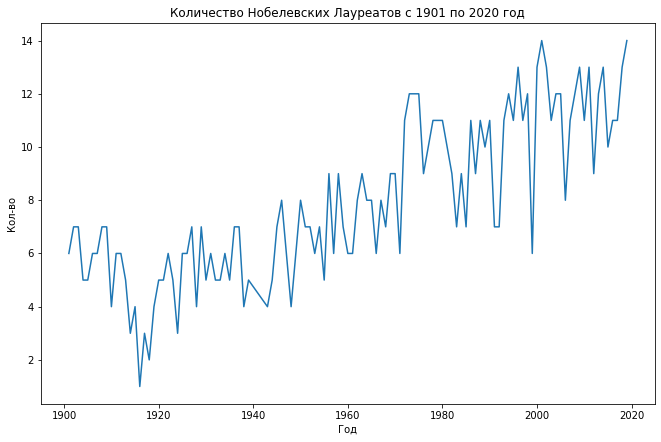

In [3]:
nobel_dynamics = df[['category', 'gender', 'year']].groupby('year').count()
plt.plot(nobel_dynamics.index, nobel_dynamics['category'])
plt.title('Количество Нобелевских Лауреатов с 1901 по 2020 год')
plt.xlabel('Год')
plt.ylabel('Кол-во')

# На основе данного графика можно сделать выво что кол-во Нобелевских лауреатов 
# растет с линейной зависимостью 

In [4]:
nobel_dynamics2 = df[['category', 'gender',]].groupby('category').count()
nobel_dynamics2

,gender
category,
chemistry,184
economics,84
literature,116
medicine,219
peace,107
physics,213


Text(0, 0.5, 'Кол-во')

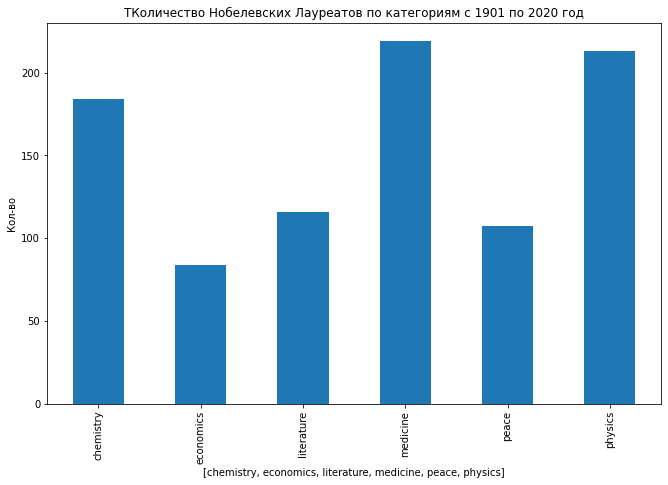

In [5]:
nobel_dynamics2.plot(kind='bar', title='ТКоличество Нобелевских Лауреатов по категориям с 1901 по 2020 год',
                     xlabel=nobel_dynamics2.index, ylabel='gender',legend=None)
plt.ylabel('Кол-во')
# Из графика можно сделать вывод что кол-во Нобелевских премий в гуманитарных областях меньше

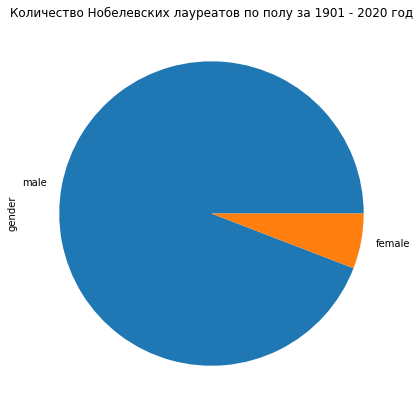

In [6]:
gender_data = df['gender'].value_counts()
gender_data.plot(kind='pie', title='Количество Нобелевских лауреатов по полу за 1901 - 2020 год')
# Количество Женщин получивших премию гораздо меньше чем мужчин.

Text(0.5, 0, 'Возраст')

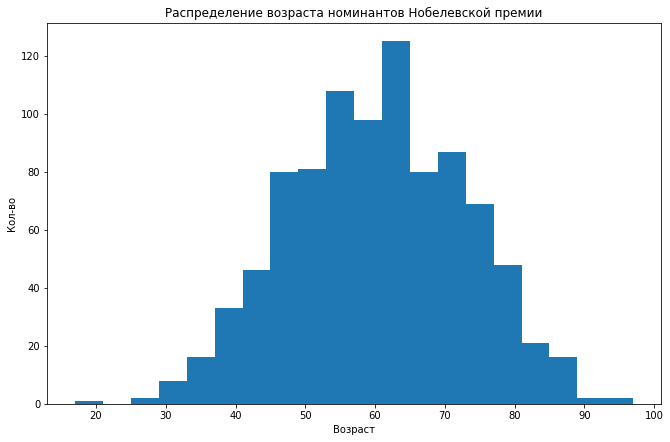

In [7]:
df['age_get_prize'].plot(kind='hist', 
                   title='Распределение возраста номинантов Нобелевской премии', bins=20)
plt.ylabel('Кол-во')
plt.xlabel('Возраст')

# Большинство номинантов получили премию в возрасте +-60 лет

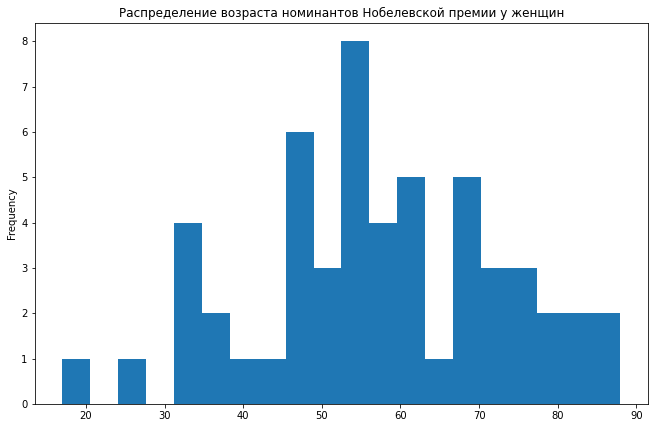

In [8]:
df.loc[df['gender'] == 'female']['age_get_prize'].plot(kind='hist', 
                   title='Распределение возраста номинантов Нобелевской премии у женщин', bins=20)
# Большинство женщин получали премию в возрасте около 55 лет

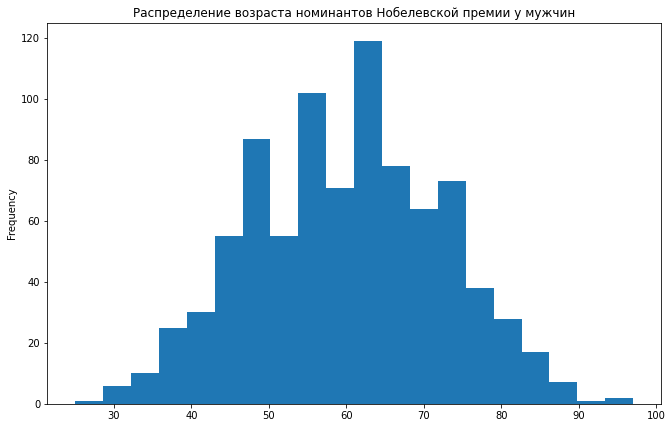

In [9]:
df.loc[df['gender'] == 'male']['age_get_prize'].plot(kind='hist', 
                   title='Распределение возраста номинантов Нобелевской премии у мужчин', bins=20)
# Большинство мужчин получали премию в возрасте около 65 лет

Text(0.5, 1.0, 'Сравнение распределений возраста Нобелеских лауреатов Мужчины/Женщины')

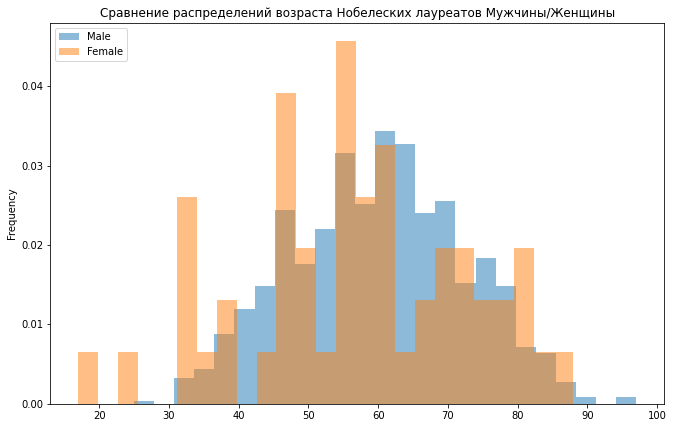

In [10]:
# Сравнение распределений возраста Нобелеских лауреатов Мужчины/Женщины

df.loc[df['gender'] == 'male']['age_get_prize'].plot(kind='hist',
                                                     alpha = 0.5,
                                                     bins=25,
                                                     density = True)
df.loc[df['gender'] == 'female']['age_get_prize'].plot(kind='hist',
                                                     alpha = 0.5,
                                                     bins=25,
                                                     density = True)
plt.legend(['Male','Female'], loc='upper left')
plt.title('Сравнение распределений возраста Нобелеских лауреатов Мужчины/Женщины')

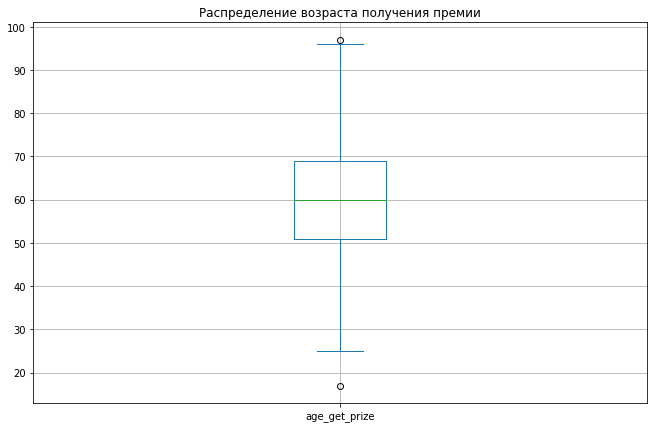

In [11]:
df['age_get_prize'].plot(kind='box',title='Распределение возраста получения премии',grid=True)

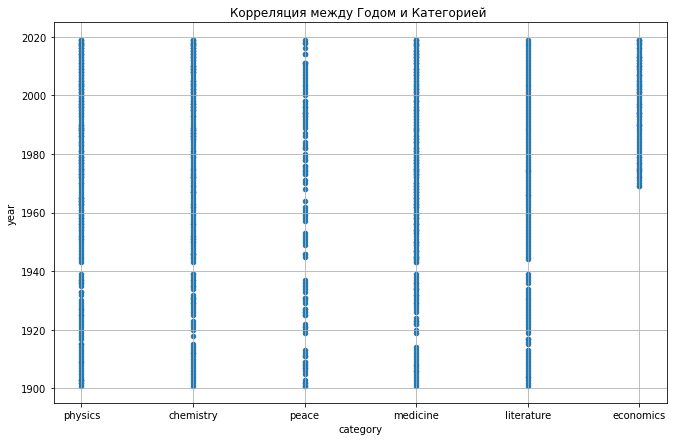

In [12]:
df.plot(kind='scatter', 
        x='category', 
        y='year', 
        title='Корреляция между Годом и Категорией ',grid=True)
# Тут видно , что премии по эконимике не было до 1970 г примерно

Text(0.5, 1.0, 'Суммарное количество Нобелевских премий по Странам и категориям ТОП 10')

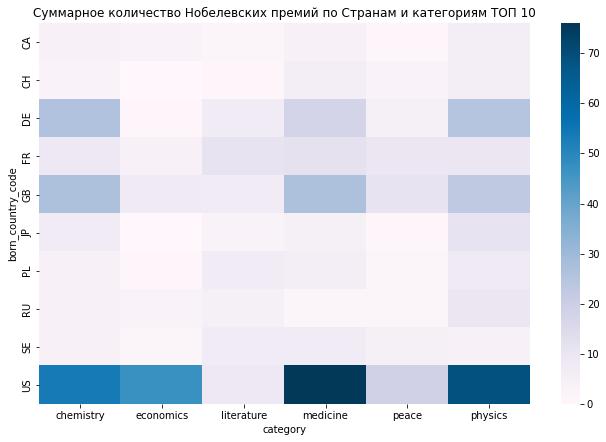

In [22]:
import seaborn as sns
df['my_index']=1
top_countries = df['born_country_code'].value_counts().sort_values(ascending=False).head(10).index.values
pvt_df = df[df['born_country_code'].isin(top_countries)].pivot_table( index='born_country_code', columns='category',
                                                                  values='my_index', aggfunc=sum ).fillna(0)
sns.heatmap(pvt_df, cmap='PuBu')
plt.title('Суммарное количество Нобелевских премий по Странам и категориям ТОП 10')
# В США самое большое количество премий

Text(0.5, 1.0, 'Возраст получения премии для ТОП10 стран по количеству полученных премий')

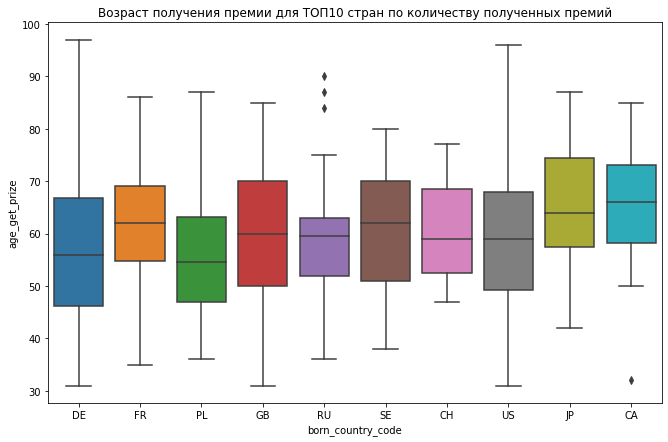

In [23]:
sns.boxplot(x="born_country_code", y="age_get_prize", data=df[df['born_country_code'].isin(top_countries)])
plt.title('Возраст получения премии для ТОП10 стран по количеству полученных премий')
# Не знаю какой тут вывод можно сделать , но красиво!